Project 1: Investigate a Dataset 
# What we can see from the firearm background checks from FBI!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the FBI Gun Data. 
There are two dataframes for this project, one is the nics firearm background checks dataframe(Github provied the latest version of this gun data which includes all data till 12/2019. So I downloaded this one from Github.) and another one a census dataframe.
The nics firearm background checks data is from FBI's National Instant Criminal Background Check System, which provides data on the number of firearm checks by month, state, and type from 1998-11 to 2019-12; the census data includes information about population, education, income and race etc in the 50 states of the USA in sevaral years.

In [1]:
#packages I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
I loaded the two datasets and had a look at the general infomation of them

In [2]:
df_gun = pd.read_csv('nics-firearm-background-checks.csv')
df_cen = pd.read_csv('u.s.-census-data.csv')

In [3]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-12,Alabama,33683.0,485.0,33020.0,25882.0,1560.0,1382,0.0,42.0,...,0.0,0.0,0.0,53.0,31.0,8.0,1.0,6.0,0.0,100100
1,2019-12,Alaska,386.0,13.0,3455.0,3080.0,397.0,215,0.0,2.0,...,0.0,0.0,0.0,18.0,13.0,1.0,0.0,0.0,0.0,7840
2,2019-12,Arizona,4536.0,649.0,18178.0,10423.0,1560.0,1109,0.0,8.0,...,2.0,0.0,0.0,20.0,6.0,2.0,0.0,0.0,0.0,38171
3,2019-12,Arkansas,2339.0,638.0,8671.0,10957.0,531.0,458,3.0,10.0,...,0.0,0.0,0.0,10.0,16.0,3.0,0.0,1.0,0.0,25699
4,2019-12,California,29544.0,0.0,40637.0,30780.0,4883.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106600


In [4]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [5]:
df_cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
df_cen['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

In [7]:
df_gun.shape

(13970, 27)

In [8]:
df_cen.shape

(85, 52)

In [9]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [10]:
df_cen.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


### Data Cleaning 
I dropped some columns which are not be used in the following analysis; deleted duplicates; removed null value rows and changed the data types.

In [3]:
#columns after 'long_gun' have too many null values, so I sliced the first 6 columns
df_gun = df_gun.iloc[:,0:6]

In [4]:
# check duplicates in df_gun
sum(df_gun.duplicated())

0

In [5]:
#check null values in df_gun
df_gun.isna().sum()

month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
long_gun             19
dtype: int64

In [6]:
# Delete the permit_recheck column since it includes too many null values
df_gun.drop(['permit_recheck'],axis = 1, inplace = True)

In [7]:
#check if still has null values left in df_gun
df_gun.isna().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
dtype: int64

In [8]:
#drop all the rows contain null vulaues in df_gun
df_gun.dropna(inplace = True)

In [9]:
#check again if still has null values left in df_gun
df_gun.isna().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
dtype: int64

In [10]:
#change data type from string to datetime for month column in df_gun
df_gun['month'] = pd.to_datetime(df_gun['month'])

In [11]:
#view the final shape for df_gun
df_gun.shape

(13946, 5)

In [12]:
# check duplicates in df_cen
sum(df_cen.duplicated())

3

In [13]:
# delete duplicates in df_cen
df_cen.drop_duplicates(inplace = True)

In [14]:
#drop the Fact Note column
df_cen.drop(['Fact Note'],axis = 1, inplace = True)

<a id='eda'></a> 
## Exploratory Data Analysis
What I want to explore in the following analysis:

1, What's the trend for permit checks over years?

2, What's the distribution of permit checks from 1998 till now?

3, In which months people were checked for peimit more than other months in a year?

4, Does permit checkes have any correlaton with capita income?

### Question 1. What's the trend for permit checks over years?

Draw a bar chart to show changes year by year

In [15]:
#I sumed up permit checkes by years
year_sum = df_gun.groupby(pd.DatetimeIndex(df_gun['month']).year)['permit'].sum()
year_sum

month
1998       78169.0
1999     1037700.0
2000     1227814.0
2001     1408338.0
2002     1363211.0
2003     1403496.0
2004     1345672.0
2005     1350193.0
2006     2037453.0
2007     3078802.0
2008     3699021.0
2009     4450822.0
2010     4884307.0
2011     5545457.0
2012     5683547.0
2013     6169832.0
2014     7769858.0
2015     8782048.0
2016    11134651.0
2017     9941684.0
2018    10229162.0
2019     6482780.0
Name: permit, dtype: float64

In [24]:
time = ["1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]

In [25]:
loc = list(range(22))
loc

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

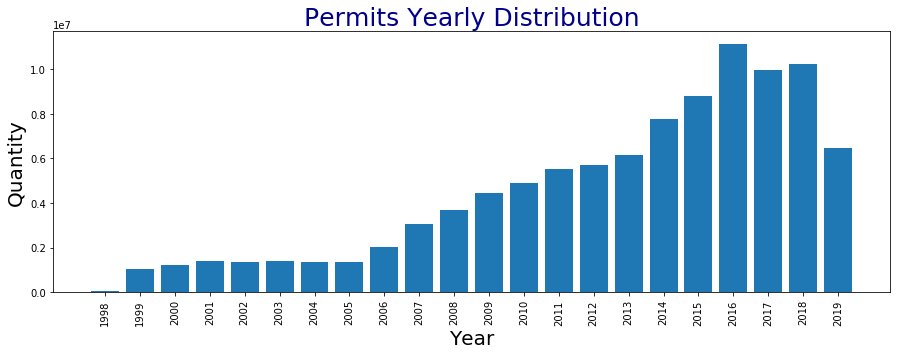

In [26]:
plt.figure(figsize=(15,4.8))
plt.bar(loc,year_sum)
plt.xticks(loc, time, rotation='vertical')
plt.title('Permits Yearly Distribution', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.ylabel('Quantity', fontsize = 20,fontname = 'DejaVu Sans')
plt.xlabel('Year',fontsize = 20,fontname = 'DejaVu Sans')
plt.show()

From the plot above, we can see since 2006, permit checks increased dramatically year by year till 2016, after that, 
the number begun to decrease.

Limitation: The number in this frame may not include all permit checks in every year in every state, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each year, since there are many trades didn't do permit checks like buy guns directly from gun owners.

### Question 2. What's the distribution of permit checks from 1998 till now?

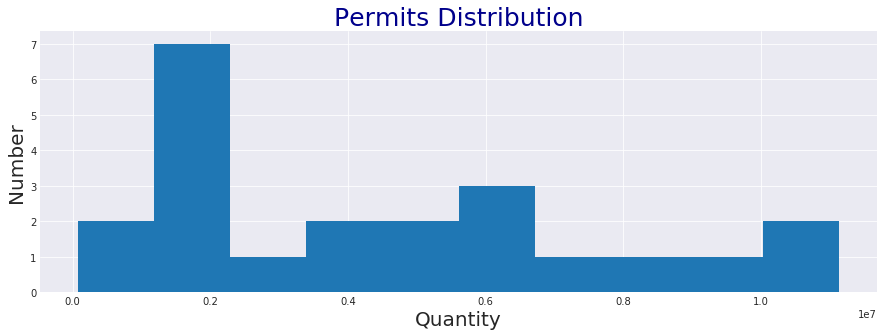

In [97]:
plt.figure(figsize=(15,4.8))
plt.hist(year_sum)
plt.title('Permits Distribution', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.ylabel('Number', fontsize = 20,fontname = 'DejaVu Sans')
plt.xlabel('Quantity',fontsize = 20,fontname = 'DejaVu Sans')
plt.show()

From the plot above, we can see the permits checks of most years are in about 0.2*le7, second most in from 0.4*le7 to 0.6*le7.

Limitation: The number in this frame may not include all permit checks in every year in every state, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each year, since there are many trades didn't do permit checks like buy guns directly from gun owners.

### Question 3. In which months people were checked for peimit more than other months in a year?

Draw a plot to show in which months people got more permits.

In [27]:
# Sumed up the permit checks by month
month_sum = df_gun.groupby(pd.DatetimeIndex(df_gun['month']).month)['permit'].sum()

In [28]:
time_month = month_sum.index

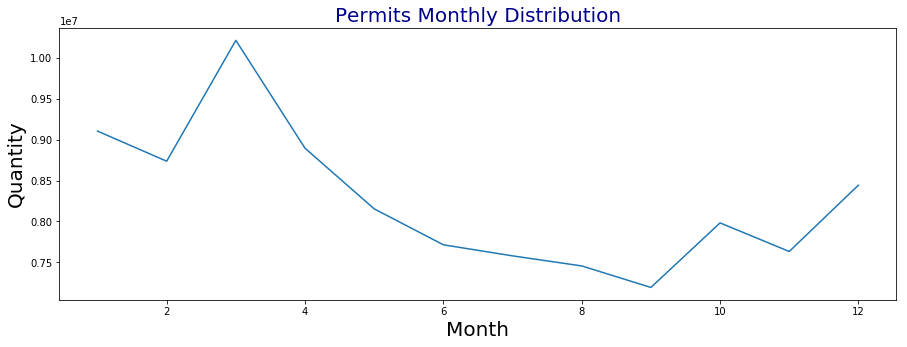

In [29]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.plot(time_month, month_sum)
plt.title('Permits Monthly Distribution', fontsize = 20, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.ylabel('Quantity', fontsize = 20,fontname = 'DejaVu Sans')
plt.xlabel('Month',fontsize = 20,fontname = 'DejaVu Sans')
plt.show()

From the plot above, we can see that permit checks reached the top in March, fell to the bottom in September. Generally from January to April have more permit checks, from June to October have less checks.

Limitation: The number in this frame may not include all permit checks in every month, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each month, since there are many trades didn't do permit checks like buy guns directly from gun owners.

### Question 4.  Does permit checkes have any correlaton with capita income?

In [58]:
#Sliced row 48(capita income in 2015 in USA)for analysis 
df_cen_income = df_cen.iloc[48]

Check the df_cen_income structure before analysis

In [59]:
df_cen_income.index

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [60]:
print(df_cen_income)

Fact              Per capita income in past 12 months (in 2015 d...
Alabama                                                    $24,091 
Alaska                                                     $33,413 
Arizona                                                    $25,848 
Arkansas                                                   $22,798 
California                                                 $30,318 
Colorado                                                   $32,217 
Connecticut                                                $38,803 
Delaware                                                   $30,554 
Florida                                                    $26,829 
Georgia                                                    $25,737 
Hawaii                                                     $29,822 
Idaho                                                      $23,399 
Illinois                                                   $30,494 
Indiana                                         

In [61]:
#Delete the Fact culumn which will not be used in analysis
df_cen_income.drop(index = 'Fact',inplace = True)

Remove the ',' and '$' in income numbers

In [19]:
df_cen_income.size

50

In [62]:
df_cen_income = df_cen_income.to_frame()

In [63]:
index = df_cen_income.index

In [64]:
#create a function to clean the income
def clean_income(income):
    for i in index:
        income[i] = income[i].replace(',', '')
        income[i] = income[i].replace('$', '')

In [65]:
#apply the function to df_cen_income
df_cen_income.apply(clean_income)
df_cen_income

,48
Alabama,24091
Alaska,33413
Arizona,25848
Arkansas,22798
California,30318
Colorado,32217
Connecticut,38803
Delaware,30554
Florida,26829
Georgia,25737


In [72]:
df_cen_income = df_cen_income.astype(int)

In [73]:
df_cen_income.dtypes

48    int64
dtype: object

Since the df_cen_income data is for 2015, I extracted all the data for 2015 from df_gun

In [74]:
#extracted all 2015 data
gun_2015 = df_gun[pd.DatetimeIndex(df_gun['month']).year == 2015]
gun_2015

,month,state,permit,handgun,long_gun
2640,2015-12-01,Alabama,31359.0,47605.0,33710.0
2641,2015-12-01,Alaska,245.0,5265.0,4638.0
2642,2015-12-01,Arizona,2940.0,25562.0,14725.0
2643,2015-12-01,Arkansas,4076.0,13780.0,15241.0
2644,2015-12-01,California,119166.0,74399.0,48762.0
2645,2015-12-01,Colorado,3265.0,34653.0,22880.0
2646,2015-12-01,Connecticut,12190.0,17828.0,6337.0
2647,2015-12-01,Delaware,297.0,3615.0,3274.0
2648,2015-12-01,District of Columbia,16.0,76.0,3.0
2649,2015-12-01,Florida,25044.0,86940.0,45769.0


In [75]:
#sumed up permit number by state,changed the datatype to int which is the same with datatype of df_cen_income
gun_2015_sum = gun_2015.groupby('state')['permit'].sum()
gun_2015_sum = gun_2015_sum.astype(int)

Check if the two datasets have the same elements to draw a plot

In [76]:
gun_2015_sum.index.difference(df_cen_income.index)

Index(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico',
       'Virgin Islands'],
      dtype='object')

In [77]:
#deleted the indexes which not in both datasets
gun_2015_sum.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico',
       'Virgin Islands'],inplace = True)

In [78]:
#checked if any not shared indexes exsit
gun_2015_sum.index.difference(df_cen_income.index)

Index([], dtype='object', name='state')

In [79]:
df_cen_income.index.difference(gun_2015_sum.index)

Index([], dtype='object')

In [80]:
df_cen_income.shape

(50, 1)

In [81]:
gun_2015_sum.shape

(50,)

In [87]:
gun_2015_sum.dtypes

dtype('int64')

In [88]:
df_cen_income.dtypes

48    int64
dtype: object

In [84]:
df_cen_income.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [85]:
gun_2015_sum.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

Draw a plot to show the correlation between capita income and permit checks

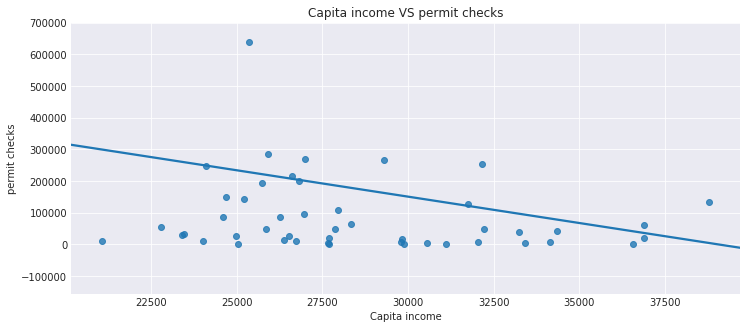

In [86]:
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.regplot(df_cen_income, gun_2015_sum, ci=None).set(title = 'Capita income VS permit checks', xlabel = 'Capita income', ylabel = 'permit checks' )
plt.ylim(top = 700000)
plt.show()

From the plot above we can see that the data in 2015 shows that the permit checks may have some correlation with capita income, but the correlation is not strong. 

Limitation: there may be a lot of factors that influnce the permit checks, like some influential securify events, 
ethnic factors and so on.

<a id='conclusions'></a>
## Conclusions
1, From the plot above, we can see since 2006, permit checks increased dramatically year by year till 2016, after that the number begun to decrease.

Limitation: The number in this frame may not include all permit checks in every year in every state, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each year, since there are many trades didn't do permit checks like buy guns directly from gun owners.

2, From the plot above, we can see the permits checks of most years are in about 0.2*le7, second most in from 0.4*le7 to 0.6*le7.

Limitation: The number in this frame may not include all permit checks in every year in every state, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each year, since there are many trades didn't do permit checks like buy guns directly from gun owners.

3, From the plot above, we can see that permit checks reached the top in March, fell to the bottom in September. Generally from January to April have more permit checks, from June to October have less checks.

Limitation: The number in this frame may not include all permit checks in every month, so we need to aware of the accuracy. And also this dosen't present all the gun trade happend in each month, since there are many trades didn't do permit checks like buy guns directly from gun owners.

4, From the plot above we can see that the data in 2015 shows that the permit checks may have some correlation with capita income, but the correlation is not strong. 

Limitation: there may be a lot of factors that influnce the permit checks, like some influential securify events, 
ethnic factors and so on.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0